# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [83]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [16]:
ls

Fitbit2.csv   titanic.csv   vehicles.csv


In [19]:
# your code here
pd.set_option('display.max_columns', None)
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [27]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [34]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

In [31]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
df_work_month= fitbit[['Months_encoded', 'Steps']]
media_month= df_work_month.groupby('Months_encoded')['Steps'].mean()
media_month

Months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: Steps, dtype: float64

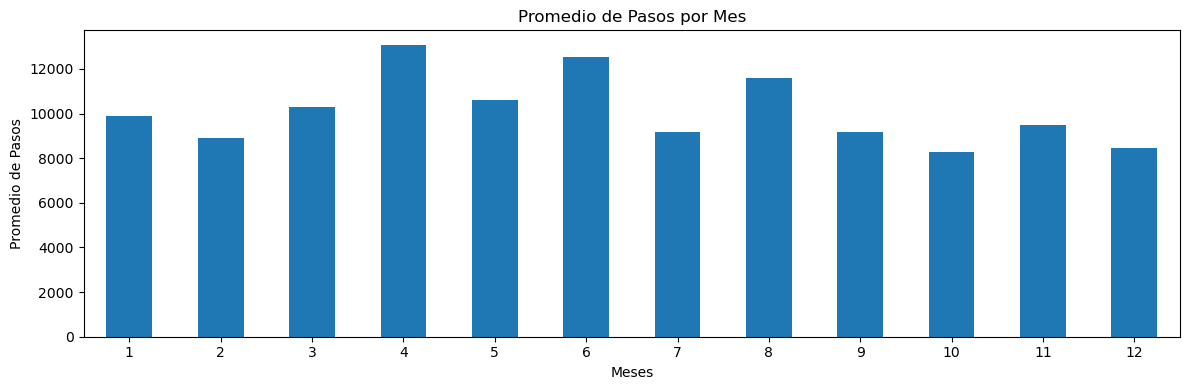

In [43]:

fig, ax = plt.subplots(figsize=(12, 4)) 
#fig es la figura y ax es el objeto de eje.

plt.sca(ax)     #plt.sca(ax) establece el objeto de eje activo como ax,
                #lo que significa que todas las operaciones y configuraciones posteriores se aplicarán a este objeto de eje específico.
    
media_month.plot(kind='bar') #traza el gráfico de barras utilizando los datos de media_month. La función plot() genera un gráfico de barras,
                             #ya que se especifica kind='bar'.

ax.set_xlabel('Meses') # etiqueta del eje x como "Meses".

ax.set_ylabel('Promedio de Pasos') # etiqueta del eje y como "Promedio de Pasos".

ax.set_title('Promedio de Pasos por Mes') # establece el título del gráfico como "Promedio de Pasos por Mes".

plt.xticks(rotation='horizontal') # establece la rotación horizontal de las etiquetas en el eje x.

plt.tight_layout() # ajusta automáticamente el diseño del gráfico para asegurarse de que las etiquetas
                   # y el contenido estén bien colocados.


plt.savefig('figures/promedio_pasos_por_mes.png') #Guarda la imagen
plt.show() # muestra el grafico y lo cierra.

In [53]:
df_work_weekend = fitbit[['Work_or_Weekend', 'Steps']]

# Calcula el promedio de pasos por tipo de día (laboral o fin de semana)
media_steps = df_work_weekend.groupby('Work_or_Weekend')['Steps'].mean()
media_steps

Work_or_Weekend
0    10064.238095
1    10144.572519
Name: Steps, dtype: float64

In [51]:
ls

Fitbit2.csv   figures/      titanic.csv   vehicles.csv


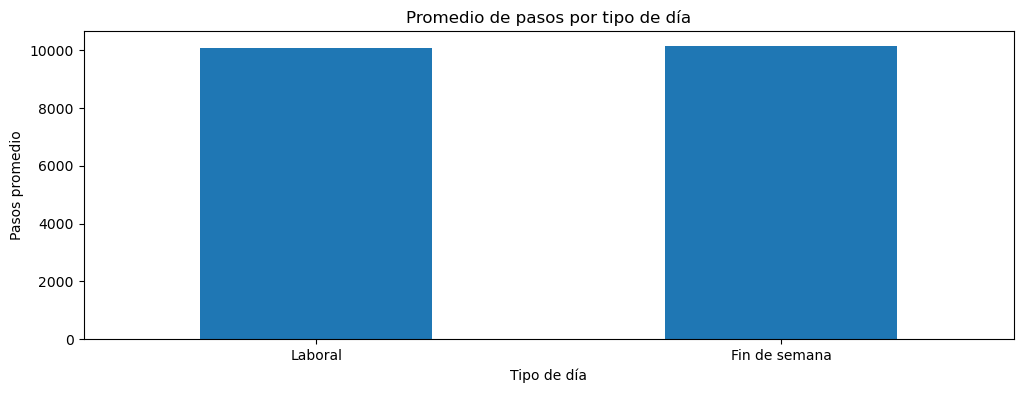

In [57]:
# Configuración de la figura
plt.figure(figsize=(12, 4))

# Crear gráfico de barras
media_steps.plot(kind='bar')

# Etiquetas de los ejes y título
plt.xlabel('Tipo de día')
plt.ylabel('Pasos promedio')
plt.title('Promedio de pasos por tipo de día')

# Configurar los ticks en el eje x
plt.xticks([0, 1], ['Laboral', 'Fin de semana'], rotation=0)

# Guardar la figura en la carpeta "figuras" en tu repositorio
plt.savefig('figures/promedio_pasos_tipo_dia.png')

# Mostrar el gráfico
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

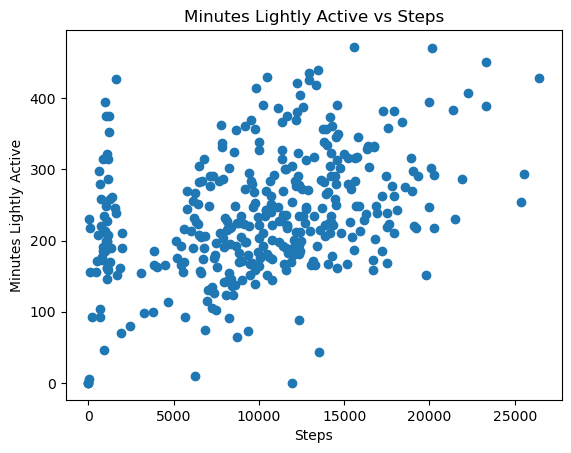

In [66]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Lightly Active'])
plt.title('Minutes Lightly Active vs Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes Lightly Active')
plt.show()

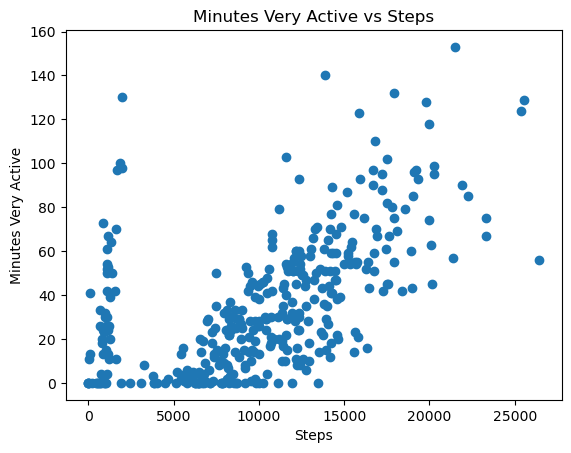

In [68]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()

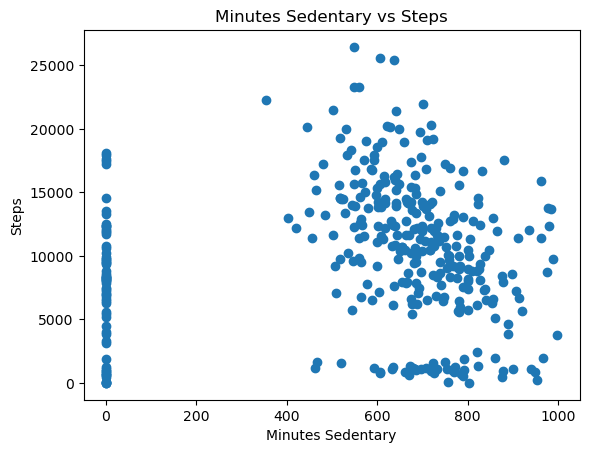

In [71]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

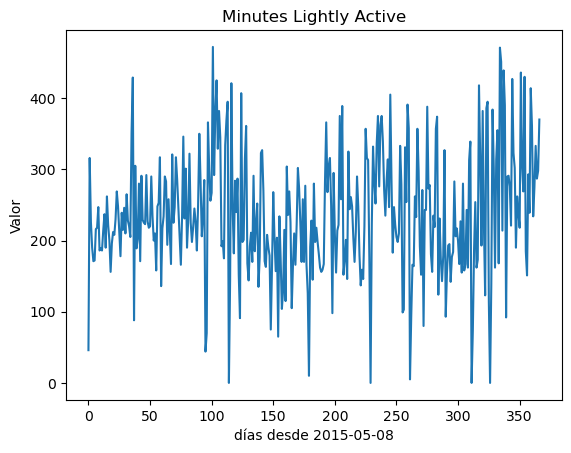

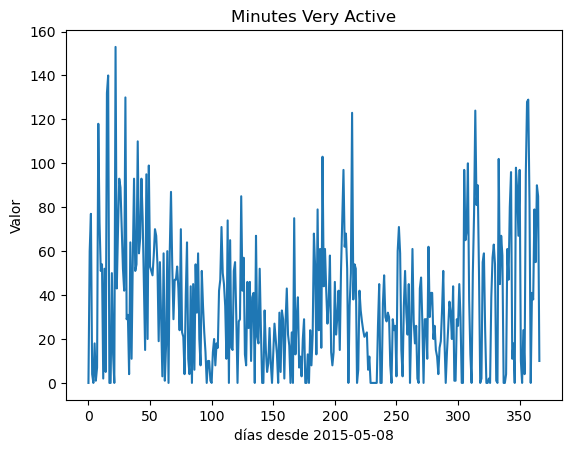

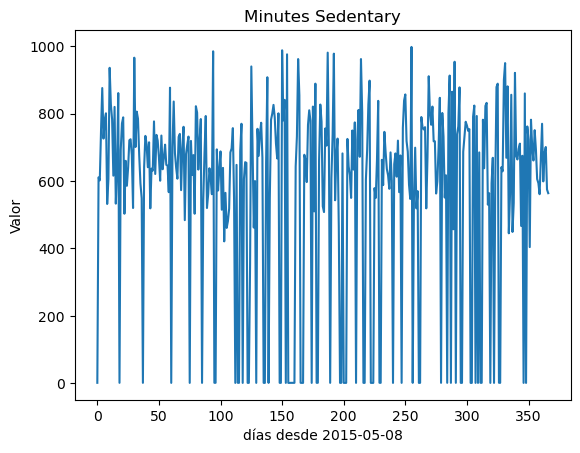

In [67]:
# Es una prueba de grafico para ver la frecuencia 

caracteristicas = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for caracteristica in caracteristicas:
    plt.figure()  # Crear una nueva figura para cada gráfico
    plt.plot(fitbit[caracteristica])  # Graficar la columna correspondiente a la característica
    plt.title(caracteristica)  # Establecer el título del gráfico como el nombre de la característica
    plt.xlabel('días desde 2015-05-08')  # Establecer la etiqueta del eje x
    plt.ylabel('Valor')  # Establecer la etiqueta del eje y
    plt.show()  # Mostrar el gráfico

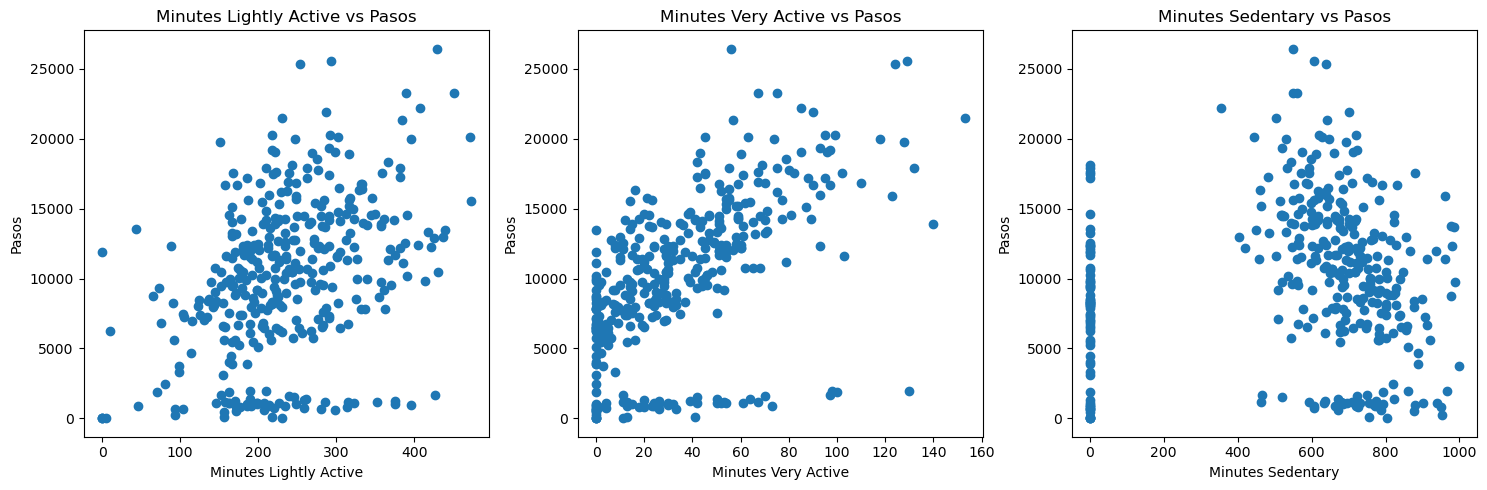

In [62]:
# Se crea variable para iterar sobre las columnas que quiero
caracteristicas = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, caracteristica in enumerate(caracteristicas):
#La función enumerate devuelve un objeto enumerado que produce pares de tuplas en cada iteración. 
#Cada tupla contiene un valor de contador y un elemento de la secuencia original. 
#El contador comienza en 0 (por defecto) o puede especificarse un número de inicio a través de un argumento opcional.
    ax = axes[i]
    ax.scatter(fitbit[caracteristica], fitbit['Steps'])
    ax.set_xlabel(caracteristica)
    ax.set_ylabel('Pasos')
    ax.set_title(f'{caracteristica} vs Pasos')

plt.tight_layout()
plt.show()

In [ ]:
# your code here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [72]:
# your code here
pd.set_option('display.max_columns', None)
titanic = pd.read_csv('titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [73]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [77]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include='number').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [76]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include='object').head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [88]:
plt.rcParams['figure.figsize']=(12, 6)

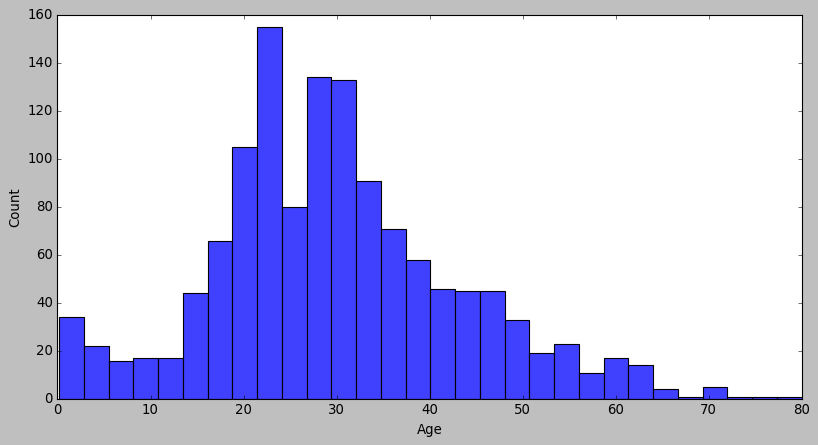

In [91]:
sns.histplot(x=titanic.Age);

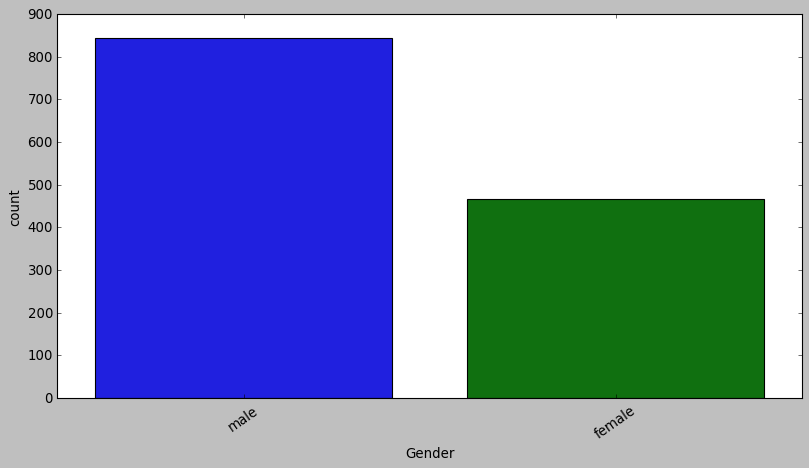

In [95]:
sns.countplot(x=titanic.Gender)
plt.xticks(rotation=35); 


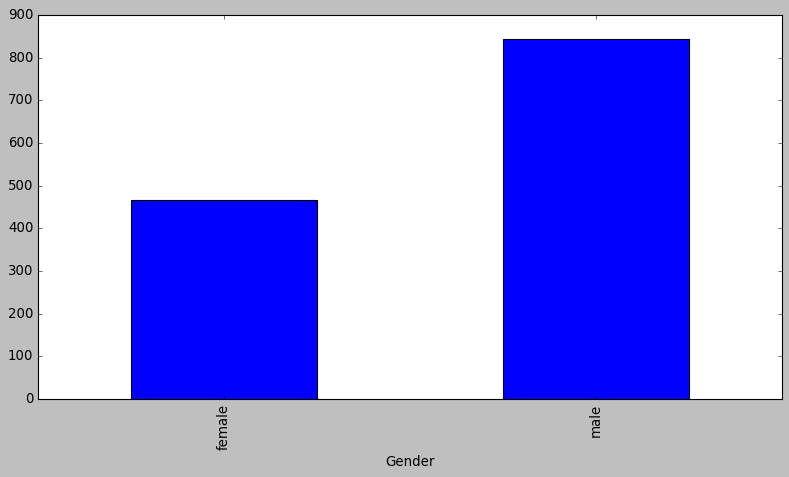

In [90]:
titanic.groupby('Gender').count()['Name'].plot(kind='bar');

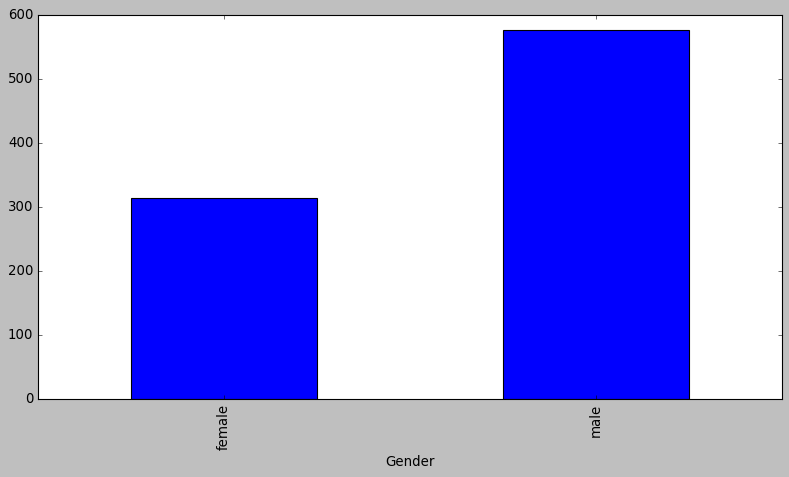

In [96]:
# your code here

titanic.groupby('Gender').count()['Survived'].plot(kind='bar');


#### Use the right visulalization to show the distribution of column `Age`.

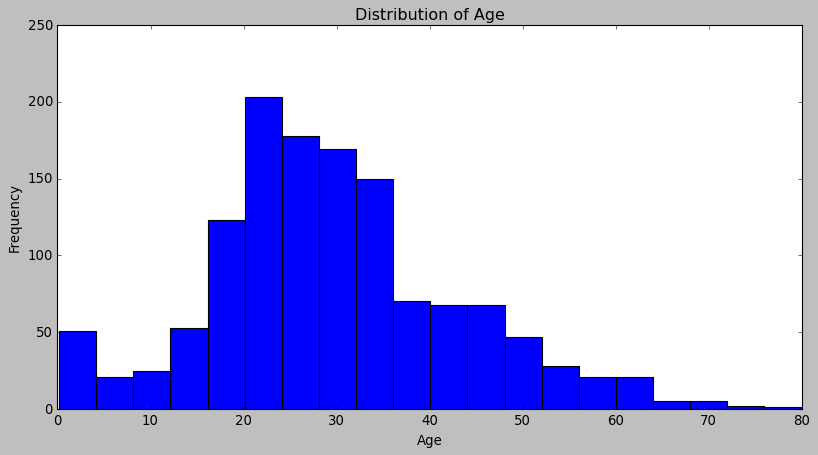

In [98]:
plt.style.use('classic')
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a histogram of the 'Age' column
plt.hist(titanic['Age'], bins=20, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

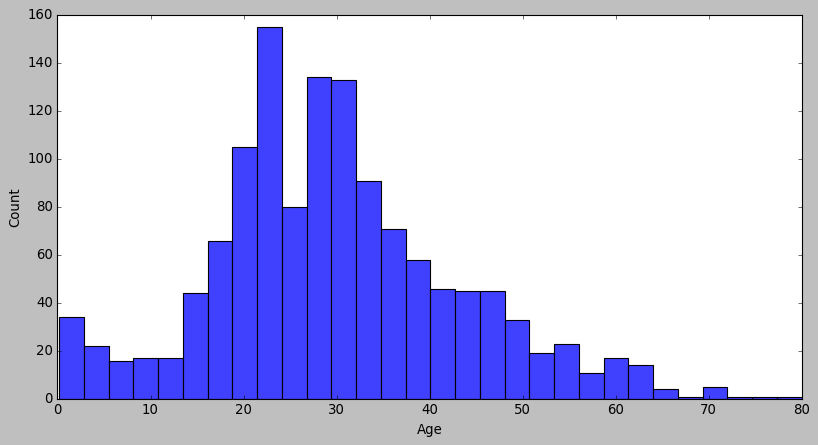

In [97]:
# Me gusta mucho mas seaborn <3
sns.histplot(x=titanic.Age);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

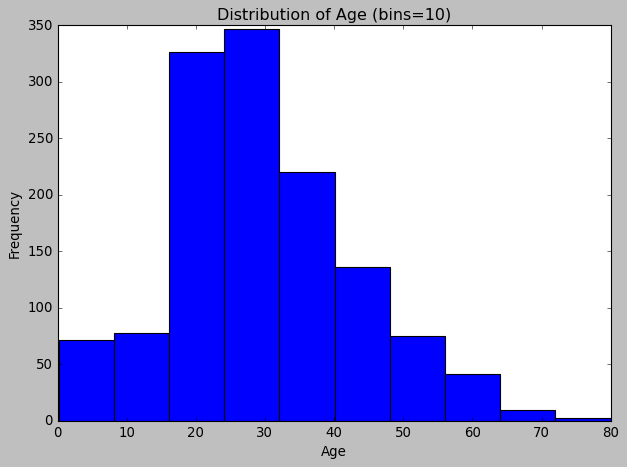

In [101]:
# Establecer el estilo de gráfico a clásico

plt.style.use('classic')

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Crear el histograma con intervalos de tamaño 10

axs.hist(titanic['Age'], bins=10)

# Establecer etiquetas y título
axs.set_xlabel('Age')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of Age (bins=10)')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

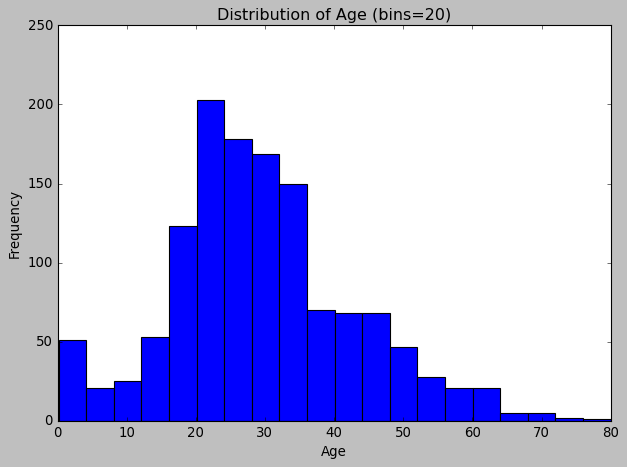

In [103]:
plt.style.use('classic')

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

axs.hist(titanic['Age'], bins=20)

axs.set_xlabel('Age')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of Age (bins=20)')


plt.tight_layout()


plt.show()

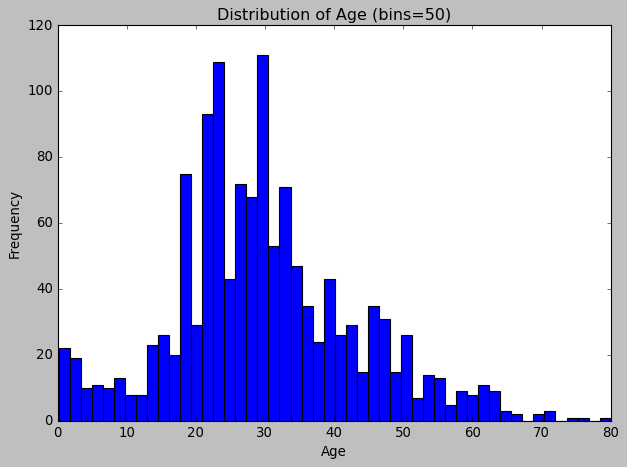

In [104]:
plt.style.use('classic')

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

axs.hist(titanic['Age'], bins=50)

axs.set_xlabel('Age')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of Age (bins=50)')


plt.tight_layout()


plt.show()

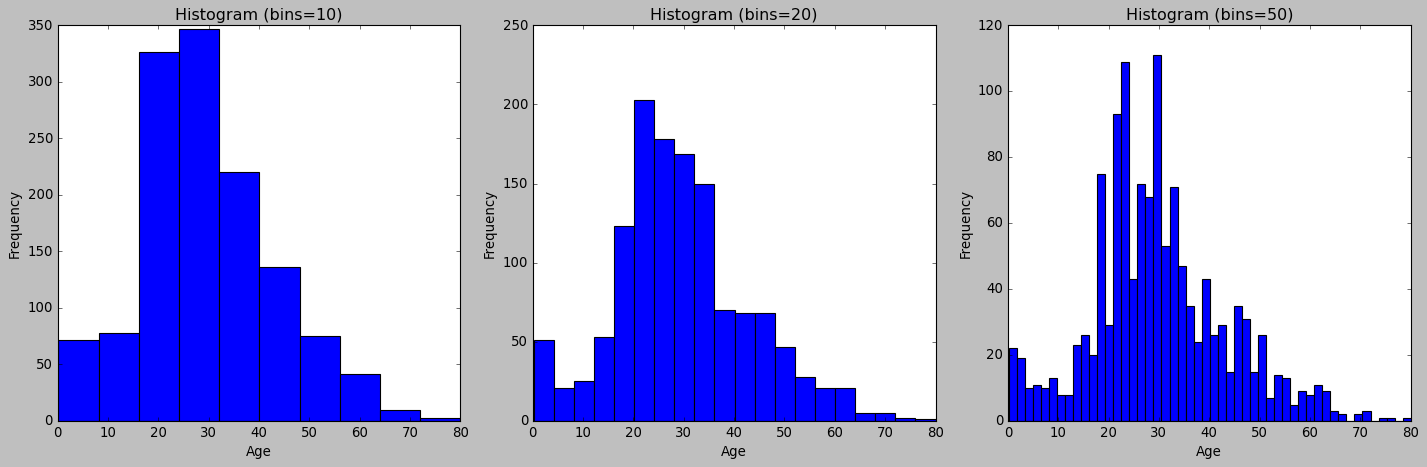

In [99]:
# your code here

plt.style.use('classic')

# crea una figura con 1 fila y 3 columnas para acomodar las tres subtramas.
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


# Cada subtrama corresponde a un tamaño de intervalo diferente: 10, 20 y 50.
bins = [10, 20, 50]
titles = ['Histogram (bins=10)', 'Histogram (bins=20)', 'Histogram (bins=50)']

for i, bin_size in enumerate(bins):

    axs[i].hist(titanic['Age'], bins=bin_size, edgecolor='black')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Frequency')

# tight_layout() ajusta el espaciado entre subtramas para evitar que se superpongan las etiquetas o los títulos.
plt.tight_layout()
plt.show()

#### How does the bin size affect your plot?

El tamaño del contendor puede afectar a como podemos interpretar los datos, es verdad, que si tiene un bins 10 se puede ver mas rapido a simple vista, en cambio el contendor 50 puede hacer que la trama se vea más comprimida, lo que puede afectar la claridad y la interpretacion de los datos

#### Use seaborn to show the distribution of column `Age`.

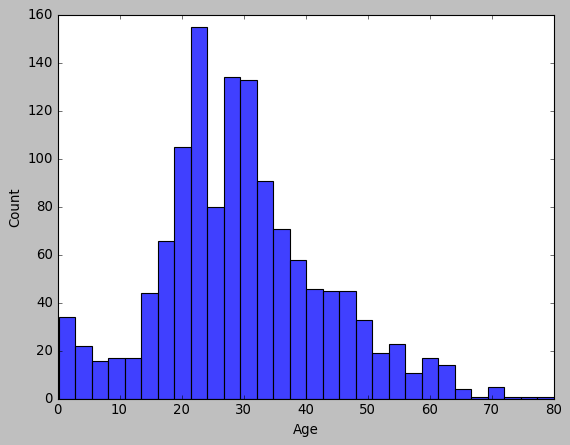

In [105]:
# your code here
sns.histplot(x=titanic.Age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

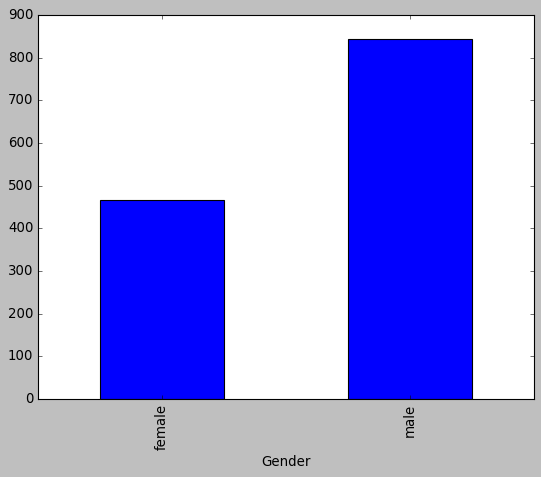

In [106]:
# Method 1 - matplotlib
# your code here
titanic.groupby('Gender').count()['Name'].plot(kind='bar');

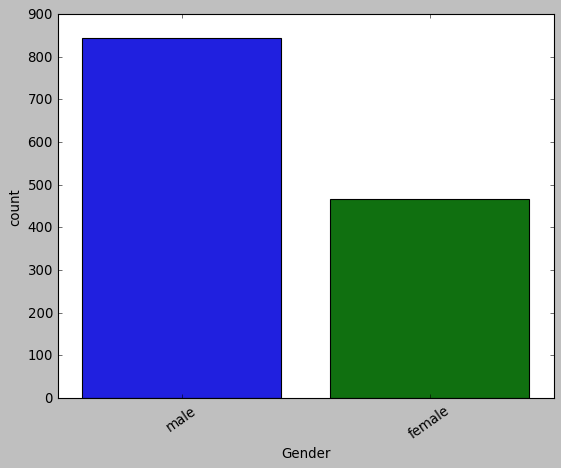

In [107]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic.Gender)
plt.xticks(rotation=35); 

#### Use the right plot to visualize the column `Pclass`.

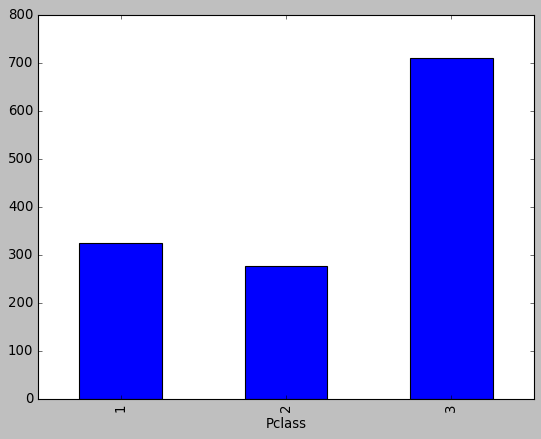

In [108]:
# your code here
titanic.groupby('Pclass').count()['Name'].plot(kind='bar');

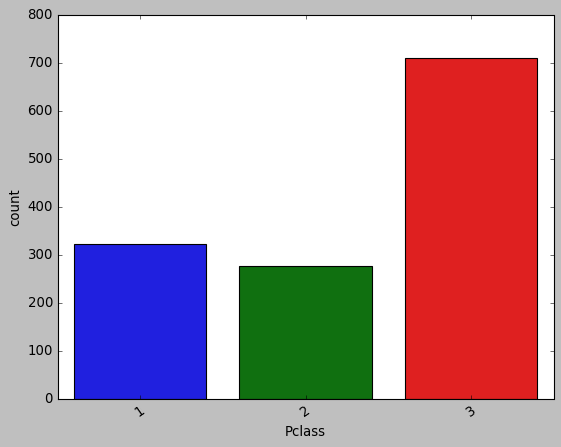

In [109]:
sns.countplot(x=titanic.Pclass)
plt.xticks(rotation=35); 

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

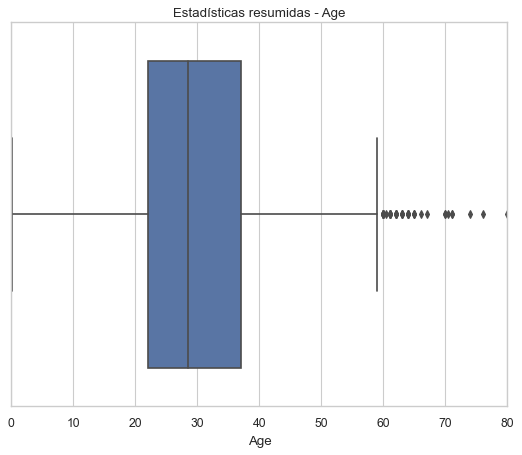

In [113]:
sns.boxplot(x=titanic['Age'])

plt.xlabel('Age')

plt.title('Estadísticas resumidas - Age')

plt.show()

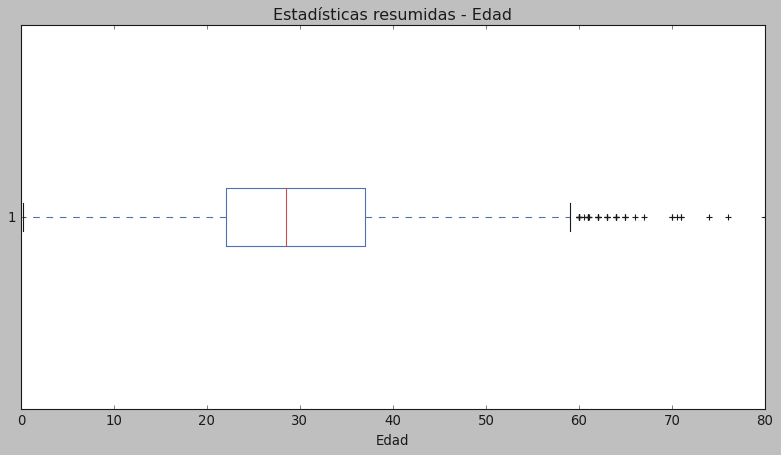

In [118]:
plt.figure(figsize=(12, 6))

plt.boxplot(titanic['Age'], vert=False)

plt.xlabel('Edad')

plt.title('Estadísticas resumidas - Edad')

plt.show()

Veo mas claro utilizar seaborn, ademas tiene menos lineas de codigo y es mas visual. 

#### What does the last plot tell you about the feature `Age`?

In [ ]:
Esto nos dice que la edad media se encuentra en 30 años y los outlayers estan en 60 

In [125]:
titanic['Age'].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

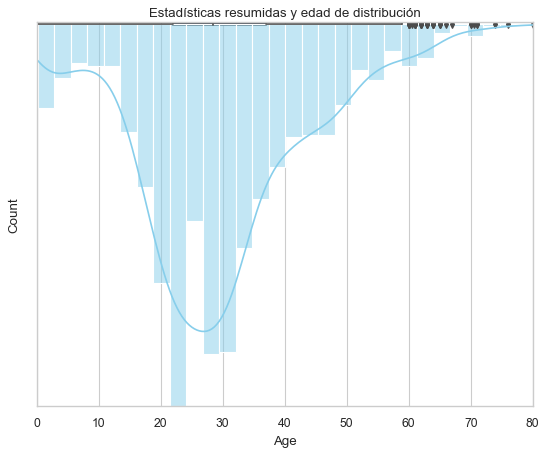

In [135]:
# your code here
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(x=titanic['Age'])

# Create a histogram
sns.histplot(x=titanic['Age'], kde=True, color='skyblue')

# Set the x-label and title
plt.xlabel('Age')
plt.title('Estadísticas resumidas y edad de distribución')

# Show the plot
plt.show()

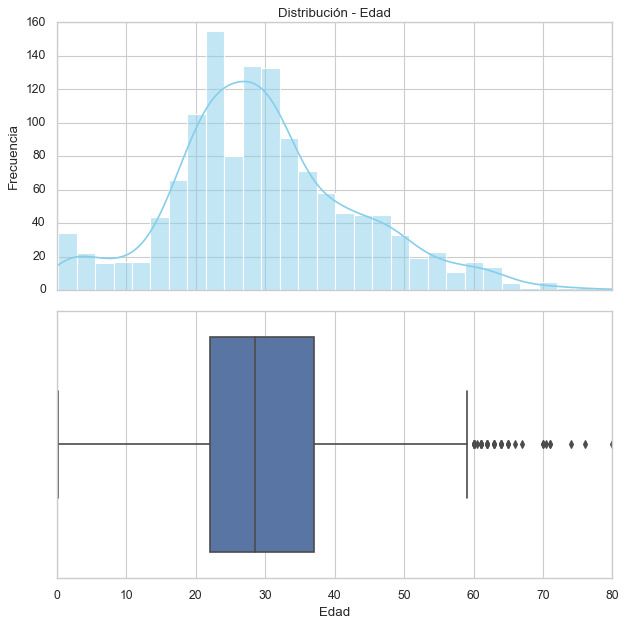

In [137]:
sns.set(style="whitegrid") # he encontrado este estilo y me gusto. 

# Esto crea una disposición de subparcelas con 2 filas y 1 columna, 
# lo que significa que tendremos dos gráficas una encima de otra

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True) #sharex asegura que ambas subparcelas compartan el mismo eje x.


# Crear el histograma en la subparcela superior
sns.histplot(x=titanic['Age'], kde=True, color='skyblue', ax=ax1)

# Establecer la etiqueta del eje y y el título de la subparcela superior
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución - Edad')

# Crear el diagrama de caja en la subparcela inferior
sns.boxplot(x=titanic['Age'], ax=ax2)

# Establecer la etiqueta del eje x y el título de la subparcela inferior
ax2.set_xlabel('Edad')
ax2.set_ylabel('')

# Ajustar el espaciado entre subparcelas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### What additional information does the last plot provide about feature `Age`?

Podemos observar en al linea la curva de inclinacion mas numeros de personas comprendidas en 30 años.  

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

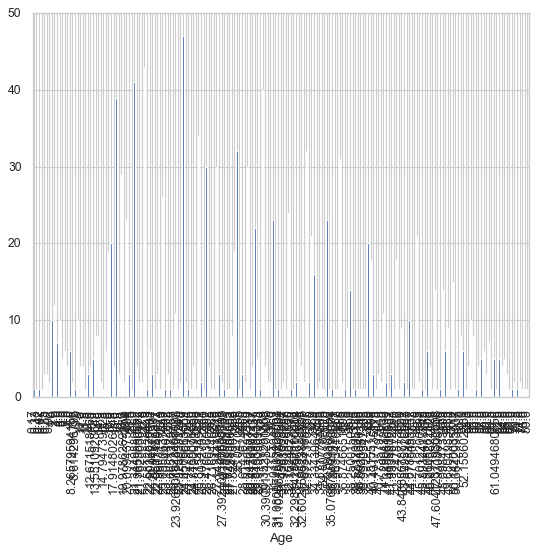

In [140]:
# Method 1 - matplotlib
# your code here
titanic.groupby('Age').count()['Fare'].plot(kind='bar');

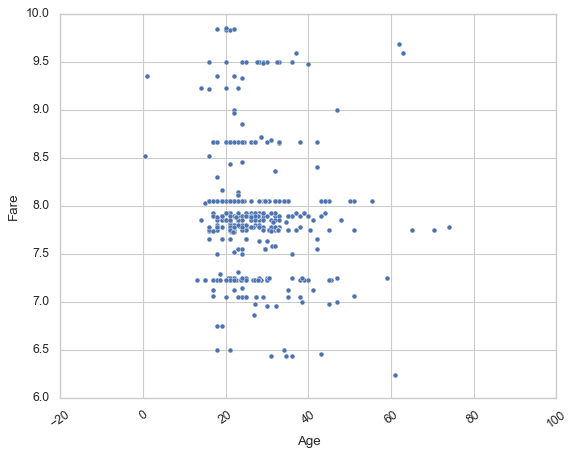

In [143]:
sns.scatterplot(data=titanic,
                x='Age',
                y='Fare')

plt.xticks(rotation=35)

plt.ylim(6, 10);   # ajuste eje y

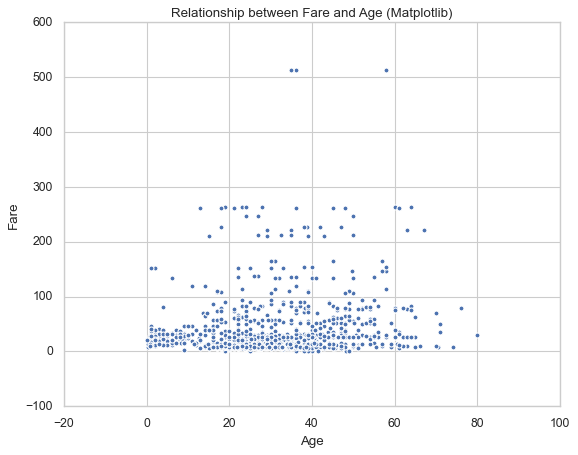

In [141]:
plt.scatter(titanic['Age'], titanic['Fare'])

plt.xlabel('Age')
plt.ylabel('Fare')


plt.title('Relacion entre la tarifa y la edad (Matplotlib)')


plt.show()

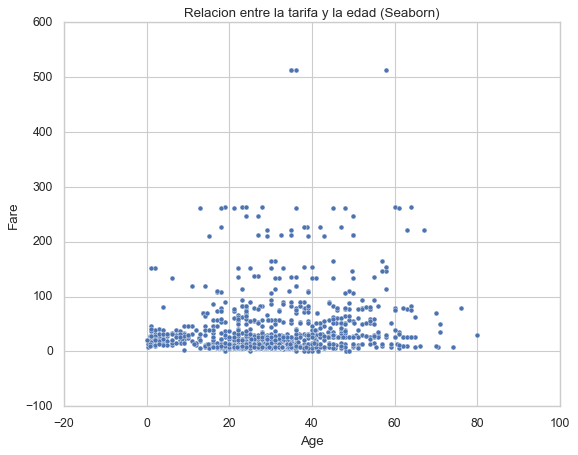

In [145]:
# Method 2 - seaborn
# your code here
sns.set(style="whitegrid")

sns.scatterplot(x=titanic['Age'], y=titanic['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

plt.title('Relacion entre la tarifa y la edad (Seaborn)')


plt.show()

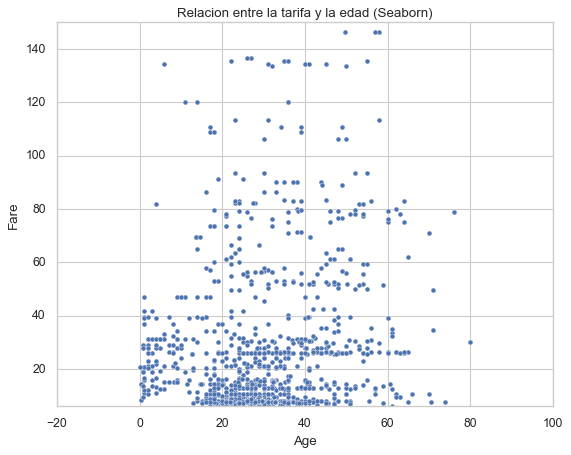

In [148]:
sns.set(style="whitegrid")

sns.scatterplot(x=titanic['Age'], y=titanic['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

plt.title('Relacion entre la tarifa y la edad (Seaborn)')
plt.ylim(6, 150); 


plt.show()

#### Plot the correlation matrix using seaborn.

In [153]:
corr=titanic.corr(method='pearson') 
corr

/var/folders/lf/9ndmv9xn2dl465fyf8f37qv40000gn/T/ipykernel_7716/4024047575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=titanic.corr(method='pearson')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


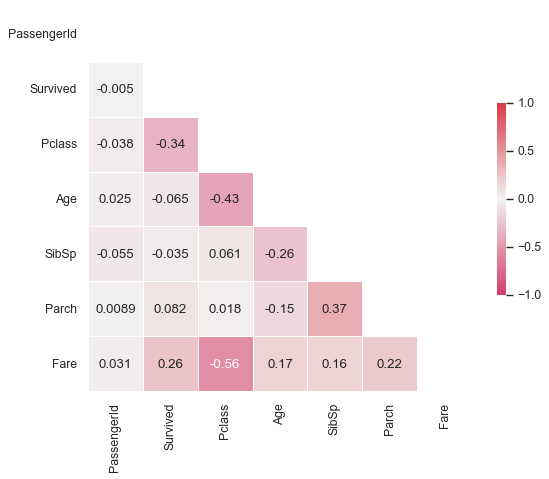

In [154]:
sns.set(style='white')     # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,          # datos
            mask=mascara,  # mascara
            cmap=cmap,     # paleta de colores
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
           );

#### What are the most correlated features?

"Survived" con "Fare" tiene una correlación positiva más fuerte de 0.257307. Esto indica que los pasajeros que pagaron tarifas más altas tienen una mayor probabilidad de haber sobrevivido.

"Pclass" con "Fare" tiene una correlación negativa fuerte de -0.558683. Esto indica que a medida que el número de clase aumenta, la tarifa tiende a ser más baja.

"Pclass" con "Age" tambien tiene una correlación negativa fuerte de -0.425965. Esto indica que a medida que la clase disminuye, la edad promedio de los pasajeros tiende a ser más baja.

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

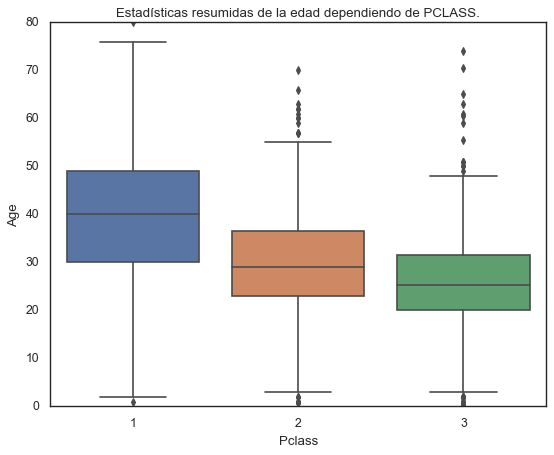

In [166]:
# your code here
sns.boxplot(x='Pclass', y='Age', data=titanic)

plt.title('Estadísticas resumidas de la edad dependiendo de PCLASS.')
plt.xlabel('Pclass')
plt.ylabel('Age')

# Show the plot
plt.show()

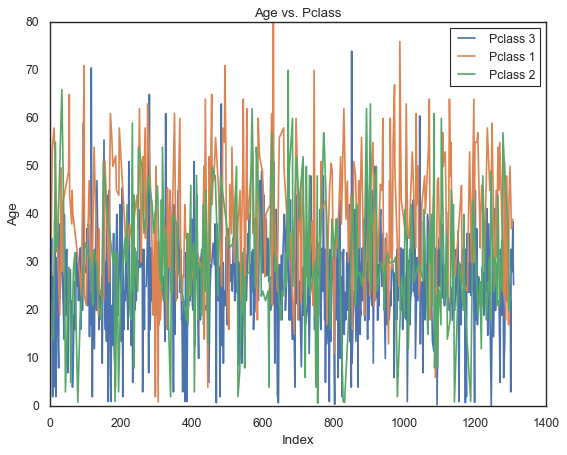

In [169]:


# Loop through each unique Pclass value
for pclass in titanic['Pclass'].unique():
    # Select rows with the current Pclass value
    subset = titanic[titanic['Pclass'] == pclass]
    
    # Plot Age for the current Pclass
    plt.plot(subset.index, subset['Age'], label=f'Pclass {pclass}')

# Add legend
plt.legend()

# Set the title and labels
plt.title('Age vs. Pclass')
plt.xlabel('Index')
plt.ylabel('Age')

# Show the plot
plt.show()

Use seaborn to plot the distribution of Age based on the Gender.

Hint: Use Facetgrid.

In [170]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


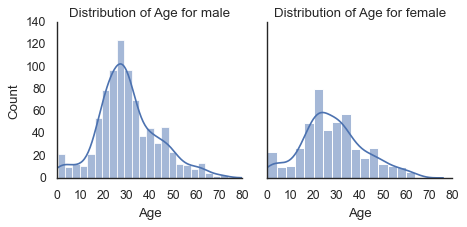

In [174]:
# your code here

# Para usar FacetGrid, asignamos como variable grid 
grid = sns.FacetGrid(data=titanic, col='Gender')

# Mapeamos la función histplot de Seaborn en la cuadrícula creada
 #Esto generará un histograma para la variable 'Age' en cada subgráfico, con una estimación de la densidad de kernel 
grid.map(sns.histplot, 'Age', kde=True) # kde=True superpuesta en la distribución 

grid.set_titles("Distribution of Age for {col_name}")
grid.set_xlabels("Age")
grid.set_ylabels("Count")

plt.show()

Conclusiones: Habian mas hombres mas cercanos a 30 y mujeres mas cercanas a 20.